必要なモジュールをインポート

In [1]:
import numpy as np
from sklearn import datasets, metrics, svm

使用するデータの大きさを確認

In [2]:
digits = datasets.load_digits()
labels = digits['target']
images = digits['images']
images.shape

(1797, 8, 8)

データの中身を表示

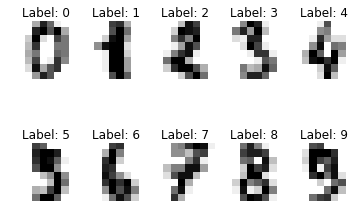

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

for i, (image, label) in enumerate(zip(images[:10], labels[:10])):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: {}'.format(label))
    plt.axis('off')

分類器に渡すためにデータを整形

In [4]:
n_samples = len(images)
X = images.reshape((n_samples, -1))

訓練とテストに使うデータをそれぞれ準備

In [5]:
train_indices = np.arange(n_samples)[:n_samples // 2]
test_indices = np.arange(n_samples)[n_samples // 2:]

訓練とテスト

In [6]:
clf = svm.SVC()
clf.fit(X[train_indices], labels[train_indices])

y_pred = clf.predict(X[test_indices])
print(metrics.classification_report(labels[test_indices], y_pred))
print(metrics.confusion_matrix(labels[test_indices], y_pred))

             precision    recall  f1-score   support

          0       1.00      0.43      0.60        88
          1       1.00      0.55      0.71        91
          2       1.00      0.34      0.50        86
          3       1.00      0.59      0.74        91
          4       1.00      0.29      0.45        92
          5       0.14      1.00      0.25        91
          6       1.00      0.36      0.53        91
          7       1.00      0.28      0.44        89
          8       1.00      0.01      0.02        88
          9       1.00      0.09      0.16        92

avg / total       0.91      0.40      0.44       899

[[38  0  0  0  0 50  0  0  0  0]
 [ 0 50  0  0  0 41  0  0  0  0]
 [ 0  0 29  0  0 57  0  0  0  0]
 [ 0  0  0 54  0 37  0  0  0  0]
 [ 0  0  0  0 27 65  0  0  0  0]
 [ 0  0  0  0  0 91  0  0  0  0]
 [ 0  0  0  0  0 58 33  0  0  0]
 [ 0  0  0  0  0 64  0 25  0  0]
 [ 0  0  0  0  0 87  0  0  1  0]
 [ 0  0  0  0  0 84  0  0  0  8]]


グリッドサーチでハイパーパラメータをチューニング

In [7]:
from sklearn import grid_search

params = {
    'gamma': [10 ** i for i in range(-3, 4)]
}
clf = grid_search.GridSearchCV(svm.SVC(), params)
clf.fit(X[train_indices], labels[train_indices])

y_pred = clf.predict(X[test_indices])
print(metrics.classification_report(labels[test_indices], y_pred))
print(metrics.confusion_matrix(labels[test_indices], y_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899

[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]
